#**DESAFIO KAGGLE - TRENDING YOUTUBE STATISTICS**

[Desafio Kaggle YouTube](https://www.kaggle.com/datasnaek/youtube-new)


#**Contexto**
O YouTube (o site de compartilhamento de v√≠deos mundialmente famoso) mant√©m uma lista dos principais v√≠deos de tend√™ncias na plataforma. De acordo com a revista Variety , ‚Äúpara determinar os v√≠deos mais populares do ano, o YouTube usa uma combina√ß√£o de fatores, incluindo a medi√ß√£o das intera√ß√µes dos usu√°rios (n√∫mero de visualiza√ß√µes, compartilhamentos, coment√°rios e curtidas). Observe que eles n√£o s√£o os v√≠deos mais vistos em geral no ano civil ‚Äù. Os principais artistas da lista de tend√™ncias do YouTube s√£o v√≠deos de m√∫sica (como o famoso "Gangam Style"), performances de celebridades e / ou reality shows e v√≠deos virais mostram que o YouTube √© bem conhecido.

Resolvemos utilizar e estudar unicamente o dataset US, como uma forma de sintetizar nosso estudo.
Conseguimos observar nesse conjunto de dados as seguintes informa√ß√µes:

* Possui **40.949** entrada de dados, cada qual com **16** colunas com vari√°veis caracter√≠sticas, incluindo desde a identifica√ß√£o dos v√≠deos carregados at√© informa√ß√µes de contagem de likes, dislikes, coment√°rios, hor√°rios de publica√ß√£o, t√≠tulos e tags, assim como os canais que produzem os v√≠deos.
O conjunto de dados analisado se restringiu apenas ao documento do USA (USvideos.csv). Algumas perguntas surgiram inicialmente e n√≥s iremos consider√°-las para realizar a explora√ß√£o dos dados.

```
Levantamento de perguntas:

1.   Quais fatores influenciam na popularidade dos v√≠deos em USA?
2.   Quais seriam as principais caracter√≠sticas para que um v√≠deo esteja entre os mais populares?
3.   Consigo verificar hor√°rios e dias da semana que seriam mais interessantes pra fazer um upload com uma maior possibilidade de visualiza√ß√µes?
4.   De que forma posso utilizar estes dados para melhorar a performance dos usu√°rios da plataforma?
5.   De que forma posso apresentar estes dados para futuros investidores da plataforma?
```





#**AN√ÅLISE EXPLORAT√ìRIA DE DADOS**

#**Pr√©-processamento**

In [1]:
import pandas as pd
import pandas_profiling

path = './USvideos.csv'
df = pd.read_csv(path)
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("df_report.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
#Importe as bibliotecas que ser√£o utilizadas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

import datetime
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Entendendo o dataset**

---

*   "video_id" - identificador do v√≠deo;
*   "trending_date - data de tend√™ncia, data em que foram cotados como populares;
*   "title" - t√≠tulo do v√≠deo;
*   "channel_title - canal do v√≠deo;
*   "category_id" - categoria do v√≠deo (no arquivo json, que ser√° carregado abaixo, ser√° criada a coluna "category_name" - correlacionando o ID √† categoria;
*   "publish-tine" - hora da publica√ß√£o;
*   "tags"- TAGS, principais palavras (s√£o utilizados como buscador";
*   "views" - quantidade de visualiza√ß√µes;
*   "likes" - quantidade de curtidas;
*   "dislikes" - quantidade de n√£o curtidas;
*   "comment_count" - quantidade de coment√°rios;
*   "thumbnail_link" - imagem de capa do v√≠deo nas buscas;
*   "comments_disabled" - coment√°rios desabilitados;
*   "ratings_disabled" - classifica√ß√µes desabilitadas;
*   "video_error_or_removed" - videos que sofreram erro ou foram removidos;
*   "description" - descri√ß√£o do v√≠deo.   


In [3]:
#Lendo o dataframe e visualizando as colunas e linhas (par√¢metro:2)
df.head(2)

video_id  ...                                        description
0  2kyS6SvSYSE  ...  SHANTELL'S CHANNEL - https://www.youtube.com/s...
1  1ZAPwfrtAFY  ...  One year after the presidential election, John...

[2 rows x 16 columns]

In [4]:
#Visualizando colunas do dataframe
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
#Visualizando as informa√ß√µes do dataframe, conseguimos aqui visualizar a contagem dos dados, o tipo, e verificar se existem dados faltantes em alguma das colunas, e que necessite de tratamento posteriormente.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [6]:
#Visualizando resumidamente os dados estat√≠sticos do dataframe, utilizando apenas os dados num√©ricos
df.describe()

category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

In [7]:
#Define a fun√ß√£o contando os valores √∫nicos no dataframe, o que facilitar√° o manuseio e a escolha das features
def count_unique(x):
  for col in x.columns:
    print(f'{col}: {x[col].nunique()}')
count_unique(df)

video_id: 6351
trending_date: 205
title: 6455
channel_title: 2207
category_id: 16
publish_time: 6269
tags: 6055
views: 40478
likes: 29850
dislikes: 8516
comment_count: 13773
thumbnail_link: 6352
comments_disabled: 2
ratings_disabled: 2
video_error_or_removed: 2
description: 6901


In [8]:
#Eliminando coluna "thumbnail_link", que n√£o √© relevante para o estudo do DF no momento
df.drop(columns='thumbnail_link', inplace=True)
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')


In [9]:
# Lendo o json disponivel no Kaggle e correlacionando com a coluna "category_id", assim conseguimos visualizar os nomes dessas categorias
#Tamb√©m definimos a coluna "category_name"

with open('US_category_id.json', 'r') as f:
  categ_us = json.load(f)

categ_dic = {}

for k in categ_us['items']:
  categ_dic[k['id']]= k['snippet']['title']

temp = df.category_id.copy()
temp = temp.astype('str')
df['category_name'] = temp.map(categ_dic)

print(df.loc[:10,['category_id', 'category_name']])

    category_id         category_name
0            22        People & Blogs
1            24         Entertainment
2            23                Comedy
3            24         Entertainment
4            24         Entertainment
5            28  Science & Technology
6            24         Entertainment
7            28  Science & Technology
8             1      Film & Animation
9            25       News & Politics
10           17                Sports


Total samples per year:
 2018    31349
2017     9600
Name: trending_date, dtype: int64


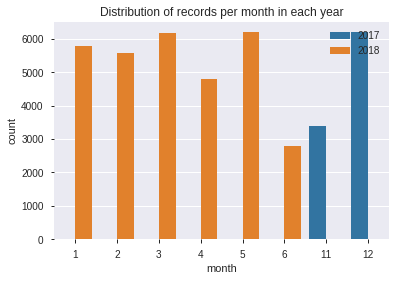

In [10]:
# Processando a feature: Tempo, utilizando datetime
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m')

year_counts = df.trending_date.dt.year.value_counts()
print('Total samples per year:\n', year_counts) 

df['year'] = df.trending_date.dt.year
df['month'] = df.trending_date.dt.month

# Mostra as distribui√ß√µes de registros/tempo (m√™s/ano)
sns.countplot(data=df, x = 'month', hue='year')
plt.title('Distribution of records per month in each year')
plt.legend(['2017', '2018'])
plt.show();

Pelo gr√°fico conseguimos extrair que o dataframe coletou dados de 2017 e 2018. 2018, os meses v√£o de Jan - Junho (1-6), onde Mar√ßo e Maio tem o maior percentual de v√≠deos entre os mais populares, j√° em 2017, a an√°lise foi feita apenas em Novembro e Dezembro, onde este √∫ltimo se equiparou aos registros mais altos de 2017.

#**Estudando popularidades, tend√™ncias, express√µes mais comuns**

Text(0.5, 1.0, 'Most viewed videos')

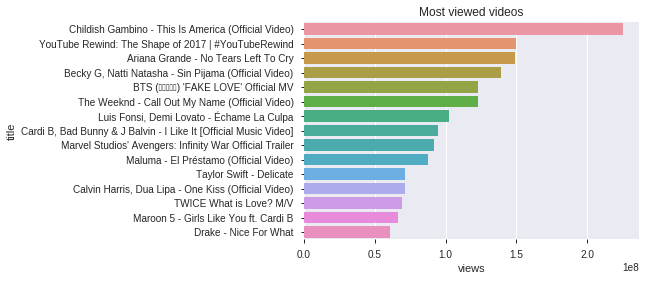

In [11]:
# Por visualiza√ß√µes
df2 = df.copy()

df2.sort_values('views', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)

sns.barplot(y='title', x='views', data=df2.iloc[:15])
plt.title('Most viewed videos')

In [12]:
df2.head(5)

video_id trending_date  ...  year month
38547  VYOjWnS4cMY    2018-06-02  ...  2018     6
6181   FlsCjmMhFmw    2017-12-14  ...  2017    12
34708  ffxKSjUwKdU    2018-05-14  ...  2018     5
34888  zEf423kYfqk    2018-05-15  ...  2018     5
38273  7C2z4GqqS5E    2018-06-01  ...  2018     6

[5 rows x 18 columns]

In [13]:
#Por Likes
df2.sort_values('likes', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

video_id trending_date  ...  year month
38273  7C2z4GqqS5E    2018-06-01  ...  2018     6
38547  VYOjWnS4cMY    2018-06-02  ...  2018     6
34708  ffxKSjUwKdU    2018-05-14  ...  2018     5
6181   FlsCjmMhFmw    2017-12-14  ...  2017    12
3581   kTlv5_Bs8aw    2017-12-01  ...  2017    12

[5 rows x 18 columns]

In [14]:
#Por deslikes
df2.sort_values('dislikes', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

video_id trending_date  ...  year month
11323  QwZT7T-TXT0    2018-01-09  ...  2018     1
6181   FlsCjmMhFmw    2017-12-14  ...  2017    12
15571  oWjxSkJpxFU    2018-02-01  ...  2018     2
38547  VYOjWnS4cMY    2018-06-02  ...  2018     6
17063  _5d-sQ7Fh5M    2018-02-09  ...  2018     2

[5 rows x 18 columns]

In [15]:
#Por coment√°rios
df2.sort_values('comment_count', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

video_id trending_date  ...  year month
11323  QwZT7T-TXT0    2018-01-09  ...  2018     1
38273  7C2z4GqqS5E    2018-06-01  ...  2018     6
6181   FlsCjmMhFmw    2017-12-14  ...  2017    12
15571  oWjxSkJpxFU    2018-02-01  ...  2018     2
3581   kTlv5_Bs8aw    2017-12-01  ...  2017    12

[5 rows x 18 columns]

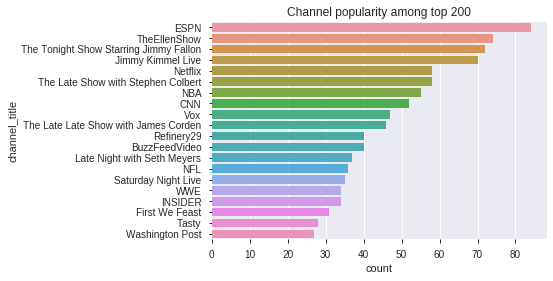

In [16]:
# Por canal
df2.drop_duplicates('video_id', inplace=True)
sns.countplot(y='channel_title', data=df2, order=df2.channel_title.value_counts().iloc[:20].index)
plt.title('Channel popularity among top 200');

Conseguimos visualizar 

In [0]:
#Dividindo por ano - A classifica√ß√£o de popularidade dos v√≠deos varia muito entre os meses
df_2017 = df[df.trending_date.dt.year == 2017]
df_2018 = df[df.trending_date.dt.year == 2018]

In [0]:
# 2017 (11-12 months)
var = 'likes'
mon = 12

In [19]:
#Apresenta os 5 primeiros v√≠deos agrupando pelo v√≠deo, t√≠tulo e quantidade de likes - os mais curtidos em Dez 2017:
df_2017.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(
    ['video_id', 'title']).sum().sort_values(var, ascending = False).head(5)

likes
video_id    title                                                       
6ZfuNTqbHE8 Marvel Studios' Avengers: Infinity War Official...  19819535
FlsCjmMhFmw YouTube Rewind: The Shape of 2017 | #YouTubeRewind  19781372
SM1w9PEQOE8 Demi Lovato - Tell Me You Love Me                    8379638
WS7f5xpGYn8 Katy Perry - Hey Hey Hey (Official)                  6776063
khPLWaBioOs Logan Paul - SANTA DISS TRACK (Official Music V...   6354734

In [0]:
# 2018 (1-6 months)
var = 'likes'
mon = 1

In [21]:
#Apresenta os 5 primeiros v√≠deos agrupando pelo v√≠deo, t√≠tulo e quantidade de likes - os mais curtidos em Jan 2018:
df_2018.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(
    ['video_id', 'title']).sum().sort_values(var, ascending = False).head(5)

likes
video_id    title                                                       
oWjxSkJpxFU Suicide: Be Here Tomorrow.                          12282280
dfnCAmr569k Taylor Swift - End Game ft. Ed Sheeran, Future      11127424
LsoLEjrDogU Bruno Mars - Finesse (Remix) [Feat. Cardi B] [O...   9188754
QwZT7T-TXT0 So Sorry.                                            8495733
Mgfe5tIwOj0 Dua Lipa - IDGAF (Official Music Video)              6866042

In [22]:
#Valor visualizar a coluna category_name (vinculada category_id com json) e contar os valores existentes, assim descobriremos as categorias mais populares neste df
df['category_name'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

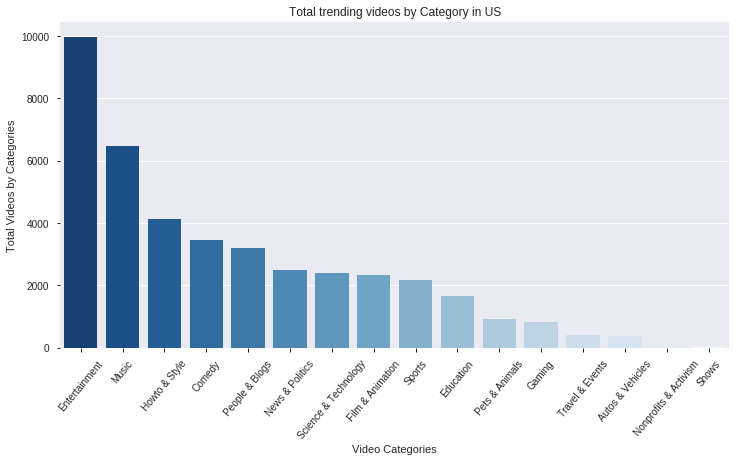

In [23]:
#Visualizando popularidade por categoria
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, palette='Blues_r', order=df['category_name'].value_counts().index)
plt.xticks(rotation=50)
plt.xlabel('Video Categories')
plt.ylabel('Total Videos by Categories')
plt.title('Total trending videos by Category in US')
plt.show()

Percebe-se aqui que os v√≠deos de "Entertainment"(9.964) s√£o os mais populares, seguido por "Music"(6.472), que tbm √© uma tend√™ncia e um tipo de entretenimento. H√° aqui uma categoria que se chama "Howto & Style", sendo canais de ensino a estiliza√ß√£o e possivelmente DIY, ou fa√ßa voc√™ mesmo, uma categoria um tanto quanto surpreendente. A √∫ltima categoria listada e com menos quantidade de diversidade, seria "Shows", talvez pela redund√¢ncia com a categoria "Music", ou pela concorr√™ncia com a divulga√ß√£o em televis√£o, ou pelo o fator humano, onde as pessoas acham mais interessante essa categoria sendo visualizada ao vivo (hip√≥teses)

In [0]:
df3 = df.copy()
#Vamos verificar agora quais ser√£o os melhores hor√°rios para publicar e os melhores dias;

In [25]:
#Ao ler a coluna 'publish_time' identificamos que a mesma encontra-se conjunta, dados de dias e hor√°rio, o que inviabiliza a visualiza√ß√£o
df3['publish_time']

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40949, dtype: object

In [0]:
#Definimos ent√£o duas novas categorias ['pub_day', 'pub_hour'], e passamos a fun√ß√£o datetime separando os dados, em seguinda elimina-se a coluna publish_time do df porque n√£o ser√° mais utilizada:
df3['pub_day'] = df3['publish_time'].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d"). date().strftime('%a'))
df3['pub_hour'] = df3['publish_time'].apply(lambda x: x[11:13])
df3.drop(labels='publish_time', axis=1, inplace=True)

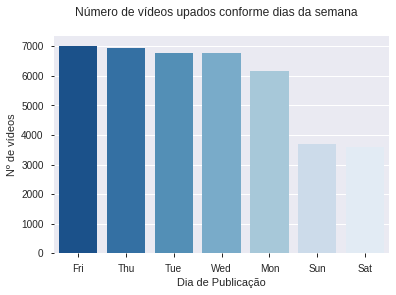

In [27]:
#Geramos um novo df, onde se passa a vari√°vel pub_day, apresentando os valores conforme index, renomeando as colunas e apresentando o plot.
new_df = df3["pub_day"].value_counts()\
.to_frame().reset_index().rename(columns={"index": "pub_day", "pub_day" : "Numero_videos"})
fig, ax = plt.subplots()
fig.suptitle("N√∫mero de v√≠deos upados conforme dias da semana")
_ = sns.barplot(x="pub_day", y="Numero_videos", data=new_df, 
                palette='Blues_r', ax=ax)
_ = ax.set(xlabel="Dia de Publica√ß√£o", ylabel="N¬∫ de v√≠deos")
plt.show();


Conseguimos perceber aqui que nas **sextas-feiras** existe um grande √≠ndice de videos publicados, enquanto, **s√°bados e domingos** tem um menor √≠ndice de upload, refletindo diretamente na tend√™ncia e popularidade.

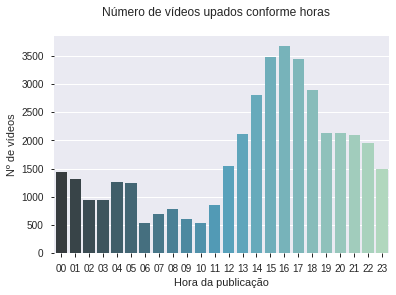

In [28]:
#Fazendo o mesmo procedimento para as horas temos:
new_df = df3["pub_hour"].value_counts()\
.to_frame().reset_index().rename(columns={"index": "pub_hour", "pub_hour" : "Numero_videos"})
fig, ax = plt.subplots()
fig.suptitle("N√∫mero de v√≠deos upados conforme horas")
_ = sns.barplot(x="pub_hour", y="Numero_videos", data=new_df, 
                palette='GnBu_d', ax=ax)
_ = ax.set(xlabel="Hora da publica√ß√£o", ylabel="N¬∫ de v√≠deos")
plt.show();

Conseguimos perceber aqui que entre **14:00AM - 19:00PM** existe um √≠ndice muito alto de v√≠deos com mais popularidade sendo publicados. A partir das 19:00PM ele sofre uma queda e se mant√©m constante at√© √†s 01:00 quando diminui novamente e fica est√°vel. Podemos perceber que **entre 15 e 18:00 s√£o os melhores hor√°rios para upload**.

In [29]:
#Vamos verificar as 30 palavras mais utilizados/comuns nos t√≠tulos, usando WordCloud vamos fazer uma nuvem de palavras
texts = list(df['title'].apply(lambda x: x.split()))
texts = [x for y in texts for x in y]
Counter(texts).most_common(30)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773)]

Se retirarmos express√µes comuns como "at", "the", "do", podemos perceber v√°rias express√µes comuns como "New", "Trailer", "VS", "Music", "Video", "Official", "Day" entre outras express√µes mais utilizadas e que est√£o entre as mais populares.

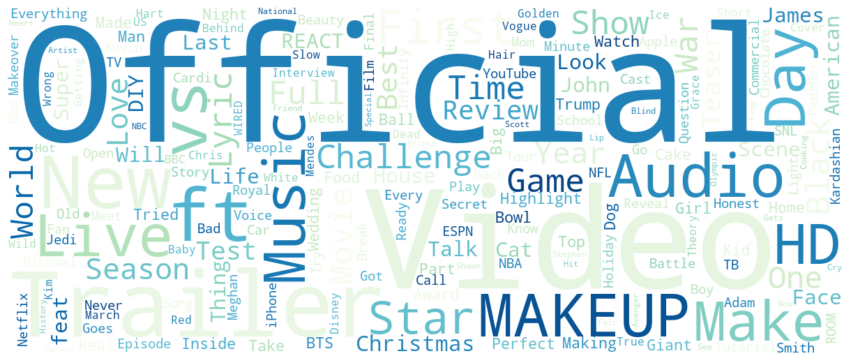

In [30]:
word_cloud = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="GnBu_r").generate(" ".join(texts))
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
_ = plt.axis("off")

Se retirarmos expess√µes comuns como "at", "the", "do", podemos perceber v√°rias express√µes comuns como **"New", "Trailer", "VS", "Music", "Video", "Official", "Day"** entre outras express√µes mais utilizadas e que est√£o entre as mais populares.

#**Outliers, Modelando, Feature Importance - ML**

In [0]:
df_US = df.copy()

In [0]:
#Vamos tratar os outliers com uma fun√ß√£o no novo dataframe:
def detect_outliers(df_US,n,features):
    outlier_indices = []
    
    for col in features:

        Q1 = np.percentile(df_US[col], 25)
        Q3 = np.percentile(df_US[col],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = df_US[(df_US[col] < Q1 - outlier_step) | (df_US[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [33]:
Outliers_to_drop = detect_outliers(df_US,1,['views', 'likes', 'dislikes', 'comment_count'])
df_US.loc[Outliers_to_drop]

video_id trending_date  ...  year month
32     n1WpP7iowLc    2017-11-14  ...  2017    11
53     9t9u_yPEidY    2017-11-14  ...  2017    11
69     Jw1Y-zhQURU    2017-11-14  ...  2017    11
70     2Vv-BfVoq4g    2017-11-14  ...  2017    11
104    pz95u3UVpaM    2017-11-14  ...  2017    11
...            ...           ...  ...   ...   ...
40704  au8QGTiPhEw    2018-06-13  ...  2018     6
40809  GnGPAYvve1A    2018-06-14  ...  2018     6
40898  hQW_9ws8OhA    2018-06-14  ...  2018     6
40902  jxWJLs7_doc    2018-06-14  ...  2018     6
40909  au8QGTiPhEw    2018-06-14  ...  2018     6

[5299 rows x 18 columns]

In [0]:
#Deletando os Outliers encontrados
df_US = df_US.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [35]:
#Percentual dos valores nulos
percent_missing = round(df_US.isnull().sum() * 100 / len(df_US),2)
missing_value_df = pd.DataFrame({'column_name': df_US.columns, 'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

column_name  percent_missing
description  description             1.44

Text(0, 0.5, 'category_id')

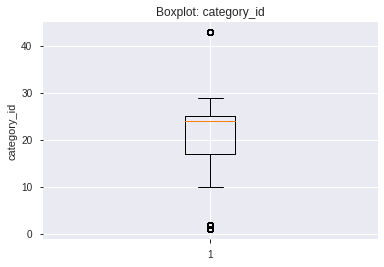

In [36]:
#Substituindo os valores na da coluna "description" e "category_name" por'Missing' 
df_US.description.fillna('Missing', inplace=True)
df_US.category_name.fillna('Missing', inplace=True)


# Detectando Valores nulos
df_US.isnull().sum()/ len(df_US) * 100

# Bloxpot feature 'category_id'
plt.boxplot(df_US['category_id'])
plt.title('Boxplot: category_id')
plt.ylabel('category_id')

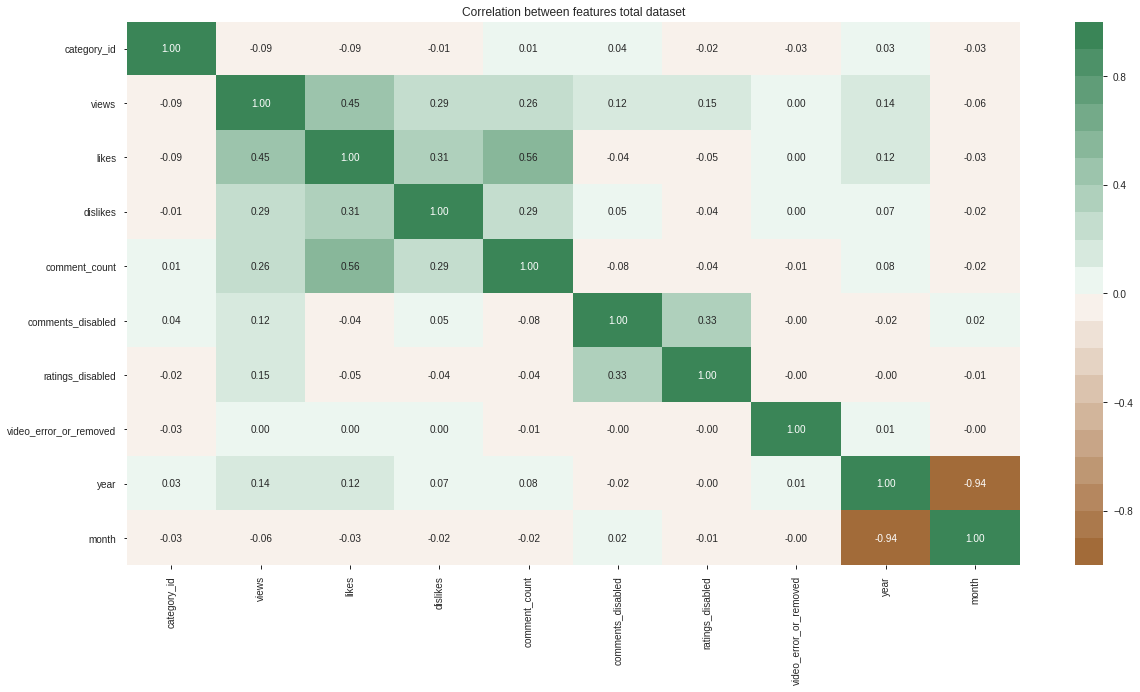

In [37]:
#An√°lise e Visualiza√ß√£o - Correla√ß√£o de todas as vari√°veis com Heatmap
plt.figure(figsize=[20,10])
plt.title('Correlation between features total dataset')
sns.heatmap(df_US.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap=sns.diverging_palette(400, 500, n=20))
plt.show()

#**CONCLUS√ïES**

Quando apresentamos os v√≠deos mais visualizados no df como um geral, aparecem v√≠deos nas categorias Entretenimento e M√∫sicas, que comprovadamente mais a frente s√£o as categorias mais populares na plataforma.

Um dos canais mais assistidos de acordo com os gr√°ficos do df, seria o da ESPN (programa voltado para esportes) e The Ellen Show (Entretenimento), conseguimos visualiz√°-los como pot√™nciais de espectadores, nos levando a entender que anunciar em um canal voltado para alguma dessas categorias ou em algum destes canais espec√≠ficos, ter√° um maior acesso por parte dos usu√°rios da plataforma.

Conseguimos visualizar nitidamente no gr√°fico de barras que Entretenimento, M√∫sica e a categoria inusitada  ‚ÄúHowto & Style‚Äù est√£o entre as principais categorias acessadas, aqui conseguimos aferir que no contexto de neg√≥cios, considerando as views, likes e at√© mesmo dislikes (toda publicidade √© ‚Äúboa‚Äù), s√£o √≥timos chamarizes para an√∫ncios, principalmente com servi√ßos, produtos e neg√≥cios que atendam a esse p√∫blico (um estudo mais aprofundado contendo m√©dia de idade, sexo, entre outros, poderia auxiliar no direcionamento de propaganda).

Observa-se tamb√©m que a maior parte dos v√≠deos que sobem para a plataforma s√£o publicados em sua grande parte, seguindo a ordem: nas sextas, quintas, ter√ßas, quartas e segundas, tendo uma queda desse propor√ß√£o aos finais de semana. Bem como conseguimos perceber tamb√©m que entre 15 e 18:00h seria o pico desses uploads, sugerindo assim esses dados que seriam √≥timas informa√ß√µes a se passar para novos users, ou empresas que utilizam a plataforma e que querem uma maior consist√™ncia e retorno nos seus v√≠deos.

√â poss√≠vel verificar com o WordCloud, as principais palavras, tags, textos que de alguma forma est√£o correlacionados n√£o s√≥ ao conte√∫do mas como um chamariz para a visualiza√ß√£o dos v√≠deos, uma vez que na nuvem de palavras conseguimos verificar v√°rias destas ligadas as principais categorias listadas entre as populares, sugerindo que, se seu v√≠deo cont√©m algum conte√∫do que correlacione a algum destes assuntos (m√∫sicas, v√≠deos, trailers, assuntos oficiais, react, maquiagem, tutoriais, audio) a probabilidade de estar entre v√≠deos com visualiza√ß√µes interessantes √© maior.


